# Классификация с помощью Keras

Качество лучшей модели: ~0.85

# Импорты библиотек

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.python.keras import Input
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.models import Sequential, load_model
from keras.utils.vis_utils import plot_model


# Загрузка и подготовка данных

In [2]:
data = pd.read_csv("../data/zoo_preprocessed.csv")
data

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


Выделим исследуемый признак

In [3]:
y = data['type'].values
y

array([1, 1, 4, 1, 1, 1, 1, 4, 4, 1, 1, 2, 4, 7, 7, 7, 2, 1, 4, 1, 2, 2,
       1, 2, 6, 5, 5, 1, 1, 1, 6, 1, 1, 2, 4, 1, 1, 2, 4, 6, 6, 2, 6, 2,
       1, 1, 7, 1, 1, 1, 1, 6, 5, 7, 1, 1, 2, 2, 2, 2, 4, 4, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 7, 4, 1, 1, 3, 7, 2, 2, 3, 7, 4, 2, 1, 7, 4, 2,
       6, 5, 3, 3, 4, 1, 1, 2, 1, 6, 1, 7, 2])

In [4]:
X = data.drop(['type'], axis=1).values
X

array([[1, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 1, 0, 1],
       [0, 0, 1, ..., 1, 0, 0],
       ...,
       [1, 0, 0, ..., 1, 0, 1],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 1, 0, 0]])

# Разбиение данных на тренировочную и тестовую выборки

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

# Эксперимент №1

*   Без скрытых слоев
*   Функция активации выходного слоя - sigmoid
*   50 эпох обучения

In [6]:
model_first = Sequential()
model_first.add(Input(16, name='InputLayer'))
model_first.add(Dense(1, activation='sigmoid', name='OutputLayer'))

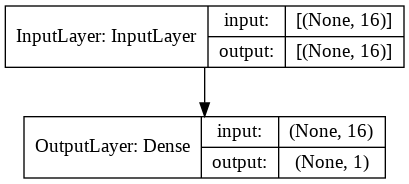

In [7]:
plot_model(model_first, show_shapes=True, show_layer_names=True)

In [8]:
model_first.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
model_first.fit(X_train, y_train, epochs=50)

Epoch 1/50
3/3 [==============================] - 0s 3ms/step - loss: -3.3107 - accuracy: 0.3898
Epoch 2/50
3/3 [==============================] - 0s 2ms/step - loss: -3.1287 - accuracy: 0.4250
Epoch 3/50
3/3 [==============================] - 0s 2ms/step - loss: -2.9729 - accuracy: 0.4094
Epoch 4/50
3/3 [==============================] - 0s 3ms/step - loss: -3.1917 - accuracy: 0.4523
Epoch 5/50
3/3 [==============================] - 0s 3ms/step - loss: -3.0031 - accuracy: 0.4641
Epoch 6/50
3/3 [==============================] - 0s 3ms/step - loss: -3.3431 - accuracy: 0.4328
Epoch 7/50
3/3 [==============================] - 0s 5ms/step - loss: -3.5435 - accuracy: 0.4328
Epoch 8/50
3/3 [==============================] - 0s 9ms/step - loss: -3.4718 - accuracy: 0.4094
Epoch 9/50
3/3 [==============================] - 0s 2ms/step - loss: -3.3286 - accuracy: 0.4055
Epoch 10/50
3/3 [==============================] - 0s 2ms/step - loss: -3.0899 - accuracy: 0.4445
Epoch 11/50
3/3 [============

In [10]:
_ , accuracy = model_first.evaluate(X_test, y_test)
print('Accuracy: %.4f' % (accuracy*100))

1/1 [==============================] - 0s 132ms/step - loss: -7.8740 - accuracy: 0.3810
Accuracy: 38.0952


# Эксперимент №2



*   1 скрытый слой (функция активации - sigmoid, 5 нейронов)
*   Функция активации выходного слоя - relu
*   100 эпох обучения



In [11]:
model_second = Sequential()
model_second.add(Input(16, name='InputLayer'))
model_second.add(Dense(5, name='HiddenLayer1', activation='sigmoid'),)
model_second.add(Dense(1, activation='relu', name='OutputLayer'))

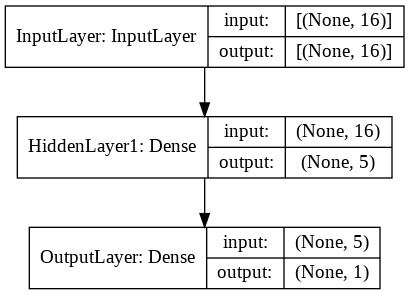

In [12]:
plot_model(model_second, show_shapes=True, show_layer_names=True)

In [13]:
model_second.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
model_second.fit(X_train, y_train, epochs=100)

Epoch 1/100
3/3 [==============================] - 0s 4ms/step - loss: 1.5030 - accuracy: 0.4383
Epoch 2/100
3/3 [==============================] - 0s 3ms/step - loss: 1.3932 - accuracy: 0.4172
Epoch 3/100
3/3 [==============================] - 0s 2ms/step - loss: 1.3396 - accuracy: 0.4172
Epoch 4/100
3/3 [==============================] - 0s 3ms/step - loss: 1.0043 - accuracy: 0.4406
Epoch 5/100
3/3 [==============================] - 0s 3ms/step - loss: 0.9843 - accuracy: 0.4016
Epoch 6/100
3/3 [==============================] - 0s 3ms/step - loss: 0.7144 - accuracy: 0.4172
Epoch 7/100
3/3 [==============================] - 0s 2ms/step - loss: 0.5336 - accuracy: 0.3820
Epoch 8/100
3/3 [==============================] - 0s 2ms/step - loss: 0.1144 - accuracy: 0.4055
Epoch 9/100
3/3 [==============================] - 0s 2ms/step - loss: 0.0997 - accuracy: 0.3820
Epoch 10/100
3/3 [==============================] - 0s 3ms/step - loss: -0.1168 - accuracy: 0.4289
Epoch 11/100
3/3 [==========

In [15]:
_ , accuracy = model_second.evaluate(X_test, y_test)
print('Accuracy: %.4f' % (accuracy*100))

1/1 [==============================] - 0s 111ms/step - loss: -29.7723 - accuracy: 0.3810
Accuracy: 38.0952


# Эксперимент №3



*   скрытый слоя (функция активации - sigmoid, 5 нейронов)
*   скрытый слоя (функция активации - sigmoid, 3 нейронов)
*   Функция активации выходного слоя - relu
*   150 эпох обучения



In [16]:
model_third = Sequential()
model_third.add(Input(16, name='InputLayer'))
model_third.add(Dense(5, name='HiddenLayer1', activation='sigmoid'),)
model_third.add(Dense(3, name='HiddenLayer2', activation='sigmoid'),)
model_third.add(Dense(1, activation='relu', name='OutputLayer'))

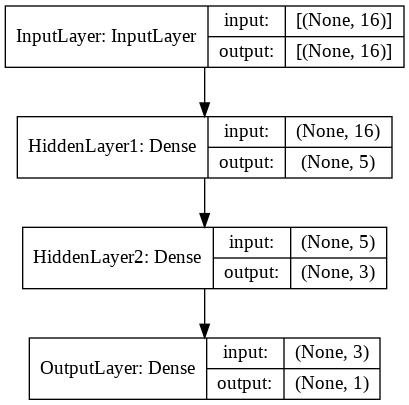

In [17]:
plot_model(model_third, show_shapes=True, show_layer_names=True)

In [18]:
model_third.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
model_third.fit(X_train, y_train, epochs=150)

Epoch 1/150
3/3 [==============================] - 0s 4ms/step - loss: 8.5507 - accuracy: 0.0000e+00
Epoch 2/150
3/3 [==============================] - 0s 3ms/step - loss: 7.5441 - accuracy: 0.0000e+00
Epoch 3/150
3/3 [==============================] - 0s 3ms/step - loss: 6.7126 - accuracy: 0.0000e+00
Epoch 4/150
3/3 [==============================] - 0s 3ms/step - loss: 6.7553 - accuracy: 0.0000e+00
Epoch 5/150
3/3 [==============================] - 0s 3ms/step - loss: 6.1761 - accuracy: 0.0000e+00
Epoch 6/150
3/3 [==============================] - 0s 2ms/step - loss: 5.7134 - accuracy: 0.0000e+00
Epoch 7/150
3/3 [==============================] - 0s 3ms/step - loss: 5.9272 - accuracy: 0.0000e+00
Epoch 8/150
3/3 [==============================] - 0s 5ms/step - loss: 5.3111 - accuracy: 0.0000e+00
Epoch 9/150
3/3 [==============================] - 0s 3ms/step - loss: 5.3674 - accuracy: 0.0000e+00
Epoch 10/150
3/3 [==============================] - 0s 5ms/step - loss: 5.2763 - accuracy: 

In [20]:
_ , accuracy = model_third.evaluate(X_test, y_test)
print('Accuracy: %.4f' % (accuracy*100))

1/1 [==============================] - 0s 107ms/step - loss: -29.7723 - accuracy: 0.3810
Accuracy: 38.0952


# Эксперимент №4

*   скрытый слоя (функция активации - sigmoid, 5 нейронов)
*   скрытый слоя (функция активации - relu, 4 нейронов)
*   скрытый слоя (функция активации - sigmoid, 3 нейрона)
*   Функция активации выходного слоя - relu
*   300 эпох обучения


In [27]:
model_fourth = Sequential()
model_fourth.add(Input(16, name='InputLayer'))
model_fourth.add(Dense(5, name='HiddenLayer1', activation='sigmoid'),)
model_fourth.add(Dense(4, name='HiddenLayer2', activation='relu'),)
model_fourth.add(Dense(3, name='HiddenLayer3', activation='sigmoid'),)
model_fourth.add(Dense(1, activation='relu', name='OutputLayer'))

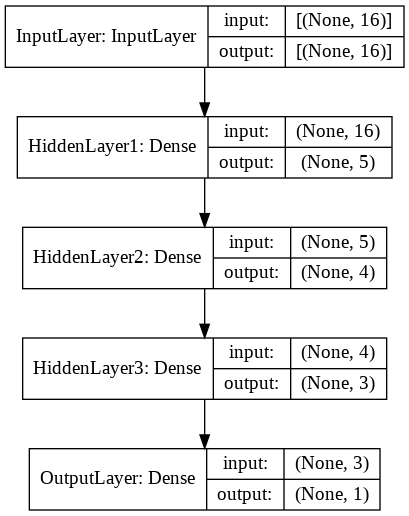

In [28]:
plot_model(model_fourth, show_shapes=True, show_layer_names=True)

In [29]:
model_fourth.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [30]:
model_fourth.fit(X_train, y_train, epochs=300)

Epoch 1/300
3/3 [==============================] - 0s 4ms/step - loss: 5.6385 - accuracy: 0.0000e+00
Epoch 2/300
3/3 [==============================] - 0s 3ms/step - loss: 5.6895 - accuracy: 0.0000e+00
Epoch 3/300
3/3 [==============================] - 0s 2ms/step - loss: 4.8665 - accuracy: 0.0000e+00
Epoch 4/300
3/3 [==============================] - 0s 3ms/step - loss: 4.8506 - accuracy: 0.0000e+00
Epoch 5/300
3/3 [==============================] - 0s 3ms/step - loss: 4.4803 - accuracy: 0.0000e+00
Epoch 6/300
3/3 [==============================] - 0s 3ms/step - loss: 4.1851 - accuracy: 0.0000e+00
Epoch 7/300
3/3 [==============================] - 0s 3ms/step - loss: 4.1642 - accuracy: 0.0000e+00
Epoch 8/300
3/3 [==============================] - 0s 5ms/step - loss: 3.7653 - accuracy: 0.0000e+00
Epoch 9/300
3/3 [==============================] - 0s 3ms/step - loss: 3.5979 - accuracy: 0.0000e+00
Epoch 10/300
3/3 [==============================] - 0s 2ms/step - loss: 3.2875 - accuracy: 

In [31]:
_ , accuracy = model_fourth.evaluate(X_test, y_test)
print('Accuracy: %.4f' % (accuracy*100))

1/1 [==============================] - 0s 126ms/step - loss: -29.7723 - accuracy: 0.3810
Accuracy: 38.0952


# Выводы

* Все модели получили одинаковый результат
* Время на обучение нейронной сети прямо пропорционально количеству эпох обучения
* Увеличение количества эпох не улучшило качество модели
* Качество моделей на основе нейронных сетей хуже качества всех классических моделей, это связано с очень малым объемом обучающей выборки

# Сохранение модели

In [32]:
model_fourth.save('../keras_models/model_fourth')

INFO:tensorflow:Assets written to: model_fourth/assets
